In [1]:
from utils import *
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import glob
from joblib import Parallel, delayed

In [2]:
transform_name = 'None'
#transform_name = 'Spike'
df = load_robustnes(transform_name)
df

Loaded 1700 files


dataset      method  transform  seed  accuracy  \
0      ChlorineConcentration  hivecotev2        NaN     1  0.733594   
0                        UMD       drcif        NaN     0  0.958333   
0                BirdChicken     tsfresh        NaN     0  0.950000   
0                     PigCVP    tsforest        NaN     0  0.081731   
0                   CricketX    tsforest        NaN     0  0.666667   
..                       ...         ...        ...   ...       ...   
0                  BeetleFly         cnn        NaN     0  0.900000   
0   GunPointMaleVersusFemale      weasel        NaN     0  0.996835   
0          EOGVerticalSignal      weasel        NaN     0  0.276243   
0                     Mallat       drcif        NaN     0  0.924520   
0          SemgHandGenderCh2    baseline        NaN     0  0.650000   

                                                 pred  \
0                                   [3 3 1 ... 3 3 3]   
0   [1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1...   
0           [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]   
0   [ 8 28  5 32  1  7  2  1 47  8 13 41 19 15 10 ...   
0   [ 4 12  8  1  5 11 11  5  8  6  6  2  9  3  7 ...   
..                                                ...   
0           [1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2]   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   
0   [ 1  1  1  5  1  1 11  2  2  1  8  9  1  7  6 ...   
0                                   [5 8 2 ... 4 8 8]   
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...   

                                                 true level  transform_type  
0                                   [2 2 1 ... 3 3 3]  None             NaN  
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  None             NaN  
0           [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]  None             NaN  
0   [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4 ...  None             NaN  
0   [ 4 12 10  1  5 11 11  5  8  8  5  2  9  3  7 ...  None             NaN  
..                                                ...   ...             ...  
0           [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]  None             NaN  
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  None             NaN  
0   [ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2 ...  None             NaN  
0                                   [5 8 2 ... 4 8 8]  None             NaN  
0   [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...  None             NaN  

[1700 rows x 9 columns]

In [3]:
df.query('dataset=="Tools"')

Empty DataFrame
Columns: [dataset, method, transform, seed, accuracy, pred, true, level, transform_type]
Index: []

In [4]:
#accs = df.groupby(['method', 'dataset']).count().reset_index()
#accs.pivot(index='dataset', columns='method', values='accuracy').reset_index().sort_values('dataset')

In [5]:
accs = df.groupby(['method', 'dataset']).mean(numeric_only=True).reset_index()
display_table = accs.pivot(index='dataset', columns='method', values='accuracy').reset_index().sort_values('dataset')

columns = display_table.columns.difference(['dataset'])
X = display_table[columns].dropna()
X

method  baseline   catch22       cnn     drcif      eknn  hivecotev2  \
1       0.020460  0.708440  0.516624  0.826087  0.611253    0.797954   
4       0.100000  0.552857  0.115714  0.587857  0.411429    0.720714   
5       0.394286  0.754286  0.777143  0.822857  0.800000    0.862857   
6       0.333333  0.920000  0.966667  1.000000  0.833333    1.000000   
8       0.500000  0.650000  0.900000  0.900000  0.750000    0.950000   
9       0.500000  0.900000  0.600000  0.950000  0.550000    0.900000   
11      0.216667  0.766667  0.750000  0.866667  0.733333    0.900000   
12      0.274052  0.915452  0.979592  0.979592  0.953353    0.982507   
13      0.532552  0.596094  0.720833  0.740365  0.650000    0.741797   
14      0.247826  0.800725  0.248551  1.000000  0.897101    0.994203   
15      0.535714  1.000000  1.000000  1.000000  1.000000    1.000000   
17      0.066667  0.571795  0.584615  0.748718  0.576923    0.815385   
18      0.074359  0.533333  0.610256  0.794872  0.566667    0.846154   
19      0.061538  0.612821  0.525641  0.807692  0.587179    0.851282   
28      0.640000  0.840000  0.830000  0.870000  0.880000    0.890000   
31      0.082873  0.549724  0.082873  0.555249  0.417127    0.643646   
32      0.082873  0.425414  0.085635  0.533149  0.441989    0.546961   
34      0.242381  0.731293  0.672027  0.736480  0.550772    0.749384   
35      0.252000  0.346000  0.248000  0.594000  0.274000    0.628000   
38      0.143415  0.693171  0.881463  0.898049  0.769268    0.961951   
44      0.500000  0.955088  0.747719  0.999298  0.675789    0.991579   
46      0.038462  0.707692  0.069231  0.807692  0.630769    0.823077   
47      0.038462  0.692308  0.038462  0.715385  0.553846    0.723077   
49      0.156977  0.598837  0.680233  0.860465  0.587209    0.883721   
52      0.506329  0.955696  0.958861  0.977848  0.898734    0.996835   
54      0.523810  0.977778  0.920635  0.968254  0.952381    0.990476   
57      0.207792  0.448052  0.207792  0.522727  0.370130    0.532468   
58      0.593750  0.531250  0.515625  0.562500  0.515625    0.640625   
61      0.473896  0.939759  0.674699  0.971888  0.678715    1.000000   
62      0.473896  0.847390  0.682731  0.903614  0.662651    0.975904   
63      0.090909  0.550505  0.600000  0.683838  0.561616    0.662626   
64      0.498542  0.884354  0.948494  0.967930  0.955296    0.970845   
67      0.260274  0.671233  0.671233  0.753425  0.575342    0.821918   
68      0.123241  0.907463  0.123241  0.924520  0.914286    0.965032   
75      0.188866  0.913196  0.113402  0.955876  0.897320    0.973402   
81      0.400000  0.700000  0.800000  0.933333  0.866667    0.900000   
83      0.613054  0.792541  0.765734  0.835664  0.761072    0.832168   
85      0.100000  0.580000  0.540000  0.700000  0.620000    0.740000   
90      0.500000  0.872222  0.966667  0.966667  0.933333    0.955556   
99      0.200000  0.811111  0.200000  0.911111  0.404444    0.888889   
100     0.100000  0.680000  0.360000  0.860000  0.700000    0.900000   
101     0.500000  1.000000  0.472222  0.972222  0.538889    1.000000   
102     0.016667  0.790833  0.016667  0.862500  0.751667    0.905833   
104     0.333333  0.853333  0.966667  0.980000  0.906667    0.980000   
105     0.429285  0.868552  0.677205  0.913478  0.695507    0.890183   
114     0.190000  1.000000  0.970000  1.000000  0.760000    1.000000   
118     0.120882  0.823283  0.124791  0.972083  0.948074    0.974316   
120     0.120882  0.696817  0.634841  0.771776  0.661642    0.779174   
122     0.892116  0.997891  0.961389  0.998540  0.995457    0.999351   
124     0.219436  0.539185  0.584639  0.681818  0.617555    0.753918   

method  inception  inception-d2  inception-d4    rocket  rocket-k500  \
1        0.823529      0.772379      0.836317  0.785166     0.728900   
4        0.735714      0.627143      0.710000  0.715000     0.664286   
5        0.902857      0.754286      0.828571  0.822857     0.817143   
6        0.993333      0.986667      0.

In [6]:
X.sort_values('tsforest')

method  baseline   catch22       cnn     drcif      eknn  hivecotev2  \
57      0.207792  0.448052  0.207792  0.522727  0.370130    0.532468   
4       0.100000  0.552857  0.115714  0.587857  0.411429    0.720714   
32      0.082873  0.425414  0.085635  0.533149  0.441989    0.546961   
101     0.500000  1.000000  0.472222  0.972222  0.538889    1.000000   
31      0.082873  0.549724  0.082873  0.555249  0.417127    0.643646   
35      0.252000  0.346000  0.248000  0.594000  0.274000    0.628000   
58      0.593750  0.531250  0.515625  0.562500  0.515625    0.640625   
63      0.090909  0.550505  0.600000  0.683838  0.561616    0.662626   
85      0.100000  0.580000  0.540000  0.700000  0.620000    0.740000   
124     0.219436  0.539185  0.584639  0.681818  0.617555    0.753918   
19      0.061538  0.612821  0.525641  0.807692  0.587179    0.851282   
17      0.066667  0.571795  0.584615  0.748718  0.576923    0.815385   
18      0.074359  0.533333  0.610256  0.794872  0.566667    0.846154   
47      0.038462  0.692308  0.038462  0.715385  0.553846    0.723077   
34      0.242381  0.731293  0.672027  0.736480  0.550772    0.749384   
5       0.394286  0.754286  0.777143  0.822857  0.800000    0.862857   
120     0.120882  0.696817  0.634841  0.771776  0.661642    0.779174   
62      0.473896  0.847390  0.682731  0.903614  0.662651    0.975904   
13      0.532552  0.596094  0.720833  0.740365  0.650000    0.741797   
46      0.038462  0.707692  0.069231  0.807692  0.630769    0.823077   
1       0.020460  0.708440  0.516624  0.826087  0.611253    0.797954   
61      0.473896  0.939759  0.674699  0.971888  0.678715    1.000000   
11      0.216667  0.766667  0.750000  0.866667  0.733333    0.900000   
67      0.260274  0.671233  0.671233  0.753425  0.575342    0.821918   
49      0.156977  0.598837  0.680233  0.860465  0.587209    0.883721   
105     0.429285  0.868552  0.677205  0.913478  0.695507    0.890183   
102     0.016667  0.790833  0.016667  0.862500  0.751667    0.905833   
8       0.500000  0.650000  0.900000  0.900000  0.750000    0.950000   
83      0.613054  0.792541  0.765734  0.835664  0.761072    0.832168   
100     0.100000  0.680000  0.360000  0.860000  0.700000    0.900000   
81      0.400000  0.700000  0.800000  0.933333  0.866667    0.900000   
28      0.640000  0.840000  0.830000  0.870000  0.880000    0.890000   
44      0.500000  0.955088  0.747719  0.999298  0.675789    0.991579   
38      0.143415  0.693171  0.881463  0.898049  0.769268    0.961951   
9       0.500000  0.900000  0.600000  0.950000  0.550000    0.900000   
99      0.200000  0.811111  0.200000  0.911111  0.404444    0.888889   
68      0.123241  0.907463  0.123241  0.924520  0.914286    0.965032   
75      0.188866  0.913196  0.113402  0.955876  0.897320    0.973402   
90      0.500000  0.872222  0.966667  0.966667  0.933333    0.955556   
52      0.506329  0.955696  0.958861  0.977848  0.898734    0.996835   
6       0.333333  0.920000  0.966667  1.000000  0.833333    1.000000   
118     0.120882  0.823283  0.124791  0.972083  0.948074    0.974316   
64      0.498542  0.884354  0.948494  0.967930  0.955296    0.970845   
54      0.523810  0.977778  0.920635  0.968254  0.952381    0.990476   
12      0.274052  0.915452  0.979592  0.979592  0.953353    0.982507   
104     0.333333  0.853333  0.966667  0.980000  0.906667    0.980000   
14      0.247826  0.800725  0.248551  1.000000  0.897101    0.994203   
114     0.190000  1.000000  0.970000  1.000000  0.760000    1.000000   
122     0.892116  0.997891  0.961389  0.998540  0.995457    0.999351   
15      0.535714  1.000000  1.000000  1.000000  1.000000    1.000000   

method  inception  inception-d2  inception-d4    rocket  rocket-k500  \
57       0.529221      0.357143      0.519481  0.525974     0.535714   
4        0.735714      0.627143      0.710000  0.715000     0.664286   
32       0.458564      0.441989      0.444751  0.552486     0.519337   
101      0.977778      0.855556      0.

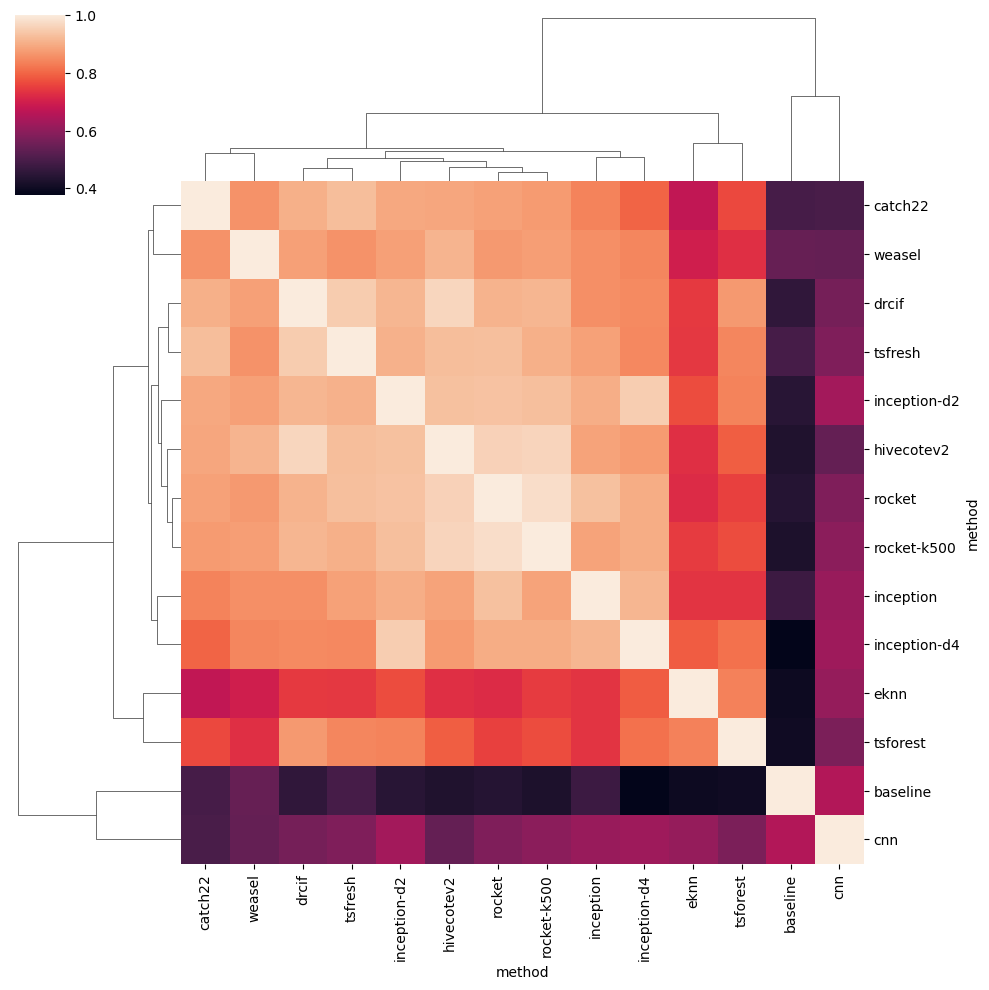

In [7]:
sns.clustermap(X.corr(method='spearman'))
plt.savefig(f'figures/similarity_method.pdf', bbox_inches='tight', pad_inches=0)

In [8]:
accs = df.groupby(['method', 'dataset']).mean(numeric_only=True).reset_index()
display_table = accs.pivot(index='method', columns='dataset', values='accuracy').reset_index()#.sort_values('dataset')

columns = display_table.columns.difference(['method'])
print(columns)
X = display_table[columns].dropna(axis=1)
X

Index(['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY',
       'AllGestureWiimoteZ', 'ArrowHead', 'BME', 'Beef', 'BeetleFly',
       'BirdChicken',
       ...
       'UWaveGestureLibraryAll', 'UWaveGestureLibraryX',
       'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'Wafer', 'Wine',
       'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga'],
      dtype='object', name='dataset', length=128)


dataset     Adiac  AllGestureWiimoteZ  ArrowHead       BME  BeetleFly  \
0        0.020460            0.100000   0.394286  0.333333       0.50   
1        0.708440            0.552857   0.754286  0.920000       0.65   
2        0.516624            0.115714   0.777143  0.966667       0.90   
3        0.826087            0.587857   0.822857  1.000000       0.90   
4        0.611253            0.411429   0.800000  0.833333       0.75   
5        0.797954            0.720714   0.862857  1.000000       0.95   
6        0.823529            0.735714   0.902857  0.993333       0.80   
7        0.772379            0.627143   0.754286  0.986667       0.80   
8        0.836317            0.710000   0.828571  0.986667       0.85   
9        0.785166            0.715000   0.822857  1.000000       0.90   
10       0.728900            0.664286   0.817143  1.000000       0.95   
11       0.739130            0.424286   0.697143  0.953333       0.80   
12       0.795396            0.577857   0.697143  1.000000       0.85   
13       0.780051            0.508571   0.845714  0.893333       0.95   

dataset  BirdChicken       Car  Chinatown  ChlorineConcentration  \
0               0.50  0.216667   0.274052               0.532552   
1               0.90  0.766667   0.915452               0.596094   
2               0.60  0.750000   0.979592               0.720833   
3               0.95  0.866667   0.979592               0.740365   
4               0.55  0.733333   0.953353               0.650000   
5               0.90  0.900000   0.982507               0.741797   
6               0.90  0.866667   0.988338               0.867708   
7               0.90  0.866667   0.979592               0.635417   
8               0.90  0.916667   0.985423               0.666927   
9               0.90  0.900000   0.979592               0.813542   
10              0.80  0.900000   0.982507               0.624479   
11              0.90  0.766667   0.976676               0.730599   
12              0.95  0.816667   0.979592               0.716797   
13              0.90  0.816667   0.956268               0.677604   

dataset  CinCECGTorso  ...  ShakeGestureWiimoteZ  ShapeletSim  ShapesAll  \
0            0.247826  ...                  0.10     0.500000   0.016667   
1            0.800725  ...                  0.68     1.000000   0.790833   
2            0.248551  ...                  0.36     0.472222   0.016667   
3            1.000000  ...                  0.86     0.972222   0.862500   
4            0.897101  ...                  0.70     0.538889   0.751667   
5            0.994203  ...                  0.90     1.000000   0.905833   
6            0.849275  ...                  0.76     0.977778   0.923333   
7            0.892754  ...                  0.80     0.855556   0.880000   
8            0.844203  ...                  0.82     0.788889   0.916667   
9            0.826812  ...                  0.90     1.000000   0.904167   
10           0.842029  ...                  0.92     0.983333   0.893333   
11           0.985507  ...                  0.82     0.488889   0.789167   
12           0.878986  ...                  0.82     0.994444   0.844167   
13           0.989855  ...                  0.64     0.994444   0.906667   

dataset  SmoothSubspace  SonyAIBORobotSurface1  Trace  UWaveGestureLibraryAll  \
0              0.333333               0.429285   0.19                0.120882   
1              0.853333               0.868552   1.00                0.823283   
2              0.966667               0.677205   0.97                0.124791   
3              0.980000               0.913478   1.00                0.972083   
4              0.906667               0.695507   0.76                0.948074   
5              0.980000               0.890183   1.00                0.974316   
6              0.966667               0.881864   1.00                0.946957   
7              0.980000               0.893511   1.00                0.851200   
8            

<Figure size 3400x3400 with 0 Axes>

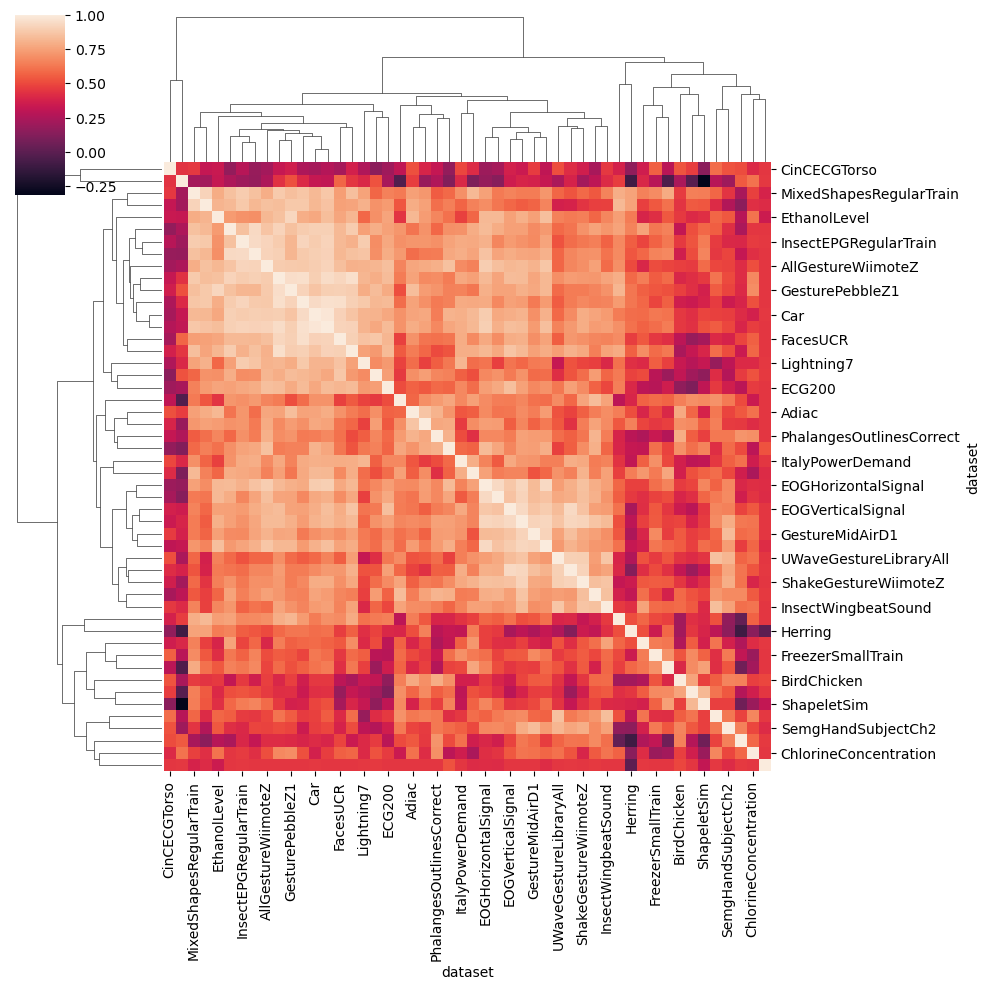

In [9]:
plt.figure(figsize=(34, 34))
sns.clustermap(X.corr(method='spearman'))
plt.savefig(f'figures/similarity_dataset.pdf', bbox_inches='tight', pad_inches=0)